In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('./drive/MyDrive/Colab Notebooks/e-comm-data.xlsx', sheet_name='E Comm')
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
for col in data:
    print(data[col].unique())

[50001 50002 50003 ... 55628 55629 55630]
[1 0]
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
['Mobile Phone' 'Phone' 'Computer']
[3 1 2]
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
['Female' 'Male']
[ 3.  2. nan  1.  0.  4.  5.]
[3 4 5 2 1 6]
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
[2 3 5 4 1]
['Single' 'Divorced' 'Married']
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
[1 0]
[11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]
[ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]
[ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]
[ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10.

### Understanding the dataset





In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


From the shape of the dataset we can see that the dataset has 5630 rows and 20 individual features.

In [ ]:
data.shape

(5630, 20)

In [ ]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Now to handle the missing values.

First lets go about filling the missing values by the median values -> Mean and median values are very close for all the above variables hence we will prefer filling the median values.

Also the median is of the same data type as the data and hence no conversion is required.

In [ ]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        data[i].fillna(data[i].median(),inplace=True)
        
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Now checking to see if any of the rows are duplicate. 

Duplicates are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points.

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
cat=[]
num=[]
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat1 = cat.copy()
num1 = num.copy()

cat =  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Plotting data

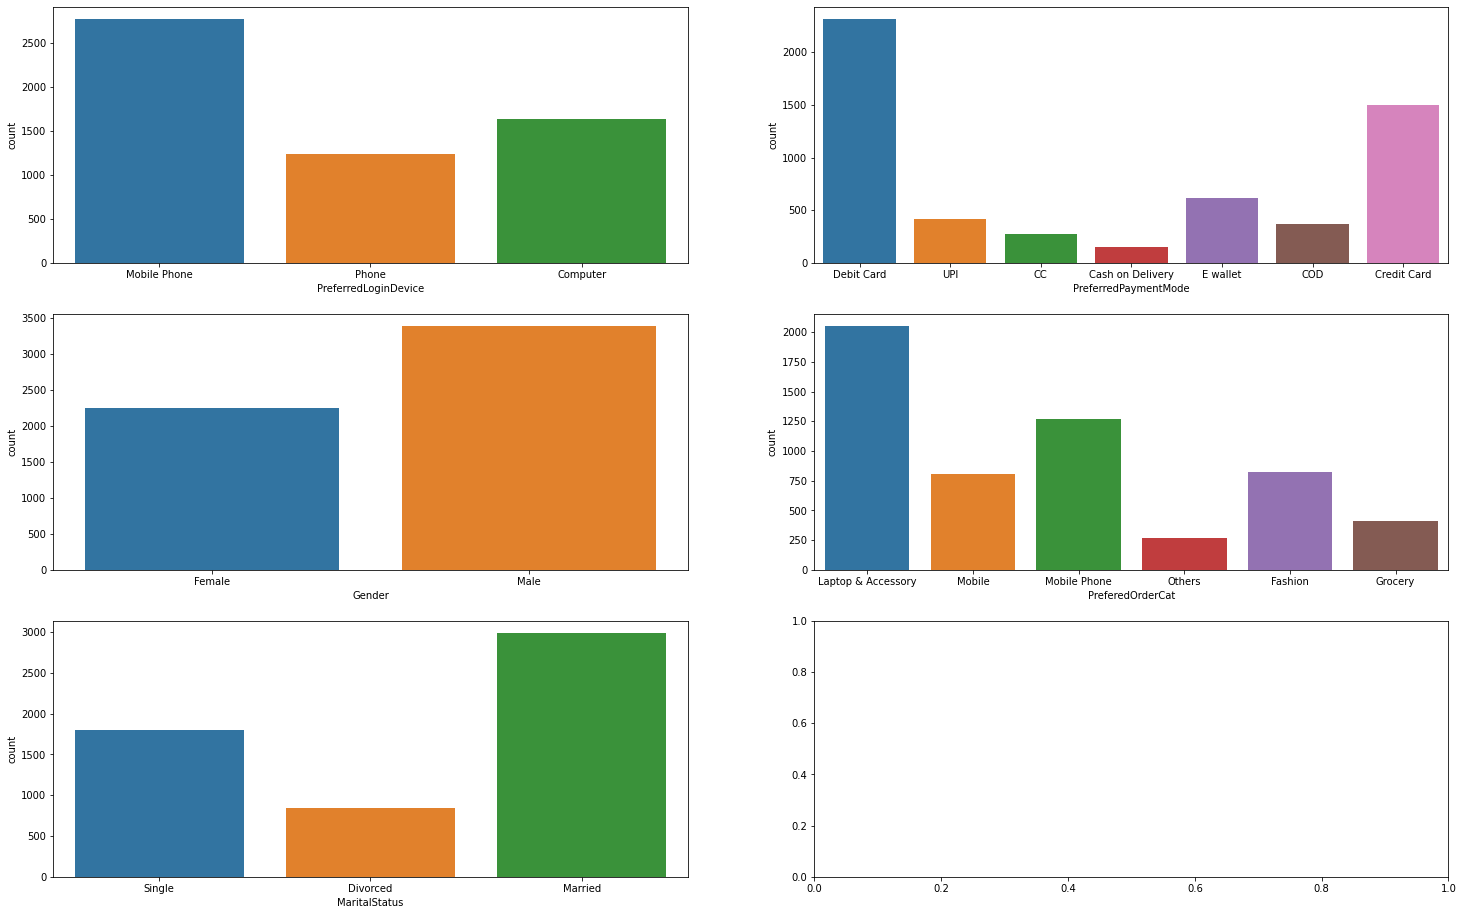

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(25,16))
k=int(0)
j = 0
for col in data.columns:
    if data[col].dtypes == 'object':
        plt.figure()
        sns.countplot(ax=ax[k][j], x=col,data=data)
        if j == 1:
          k+=1
        j=(j+1)%2
        # print(data[i].value_counts())
        print("\n")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b1835cad0>,
      dtype=object)

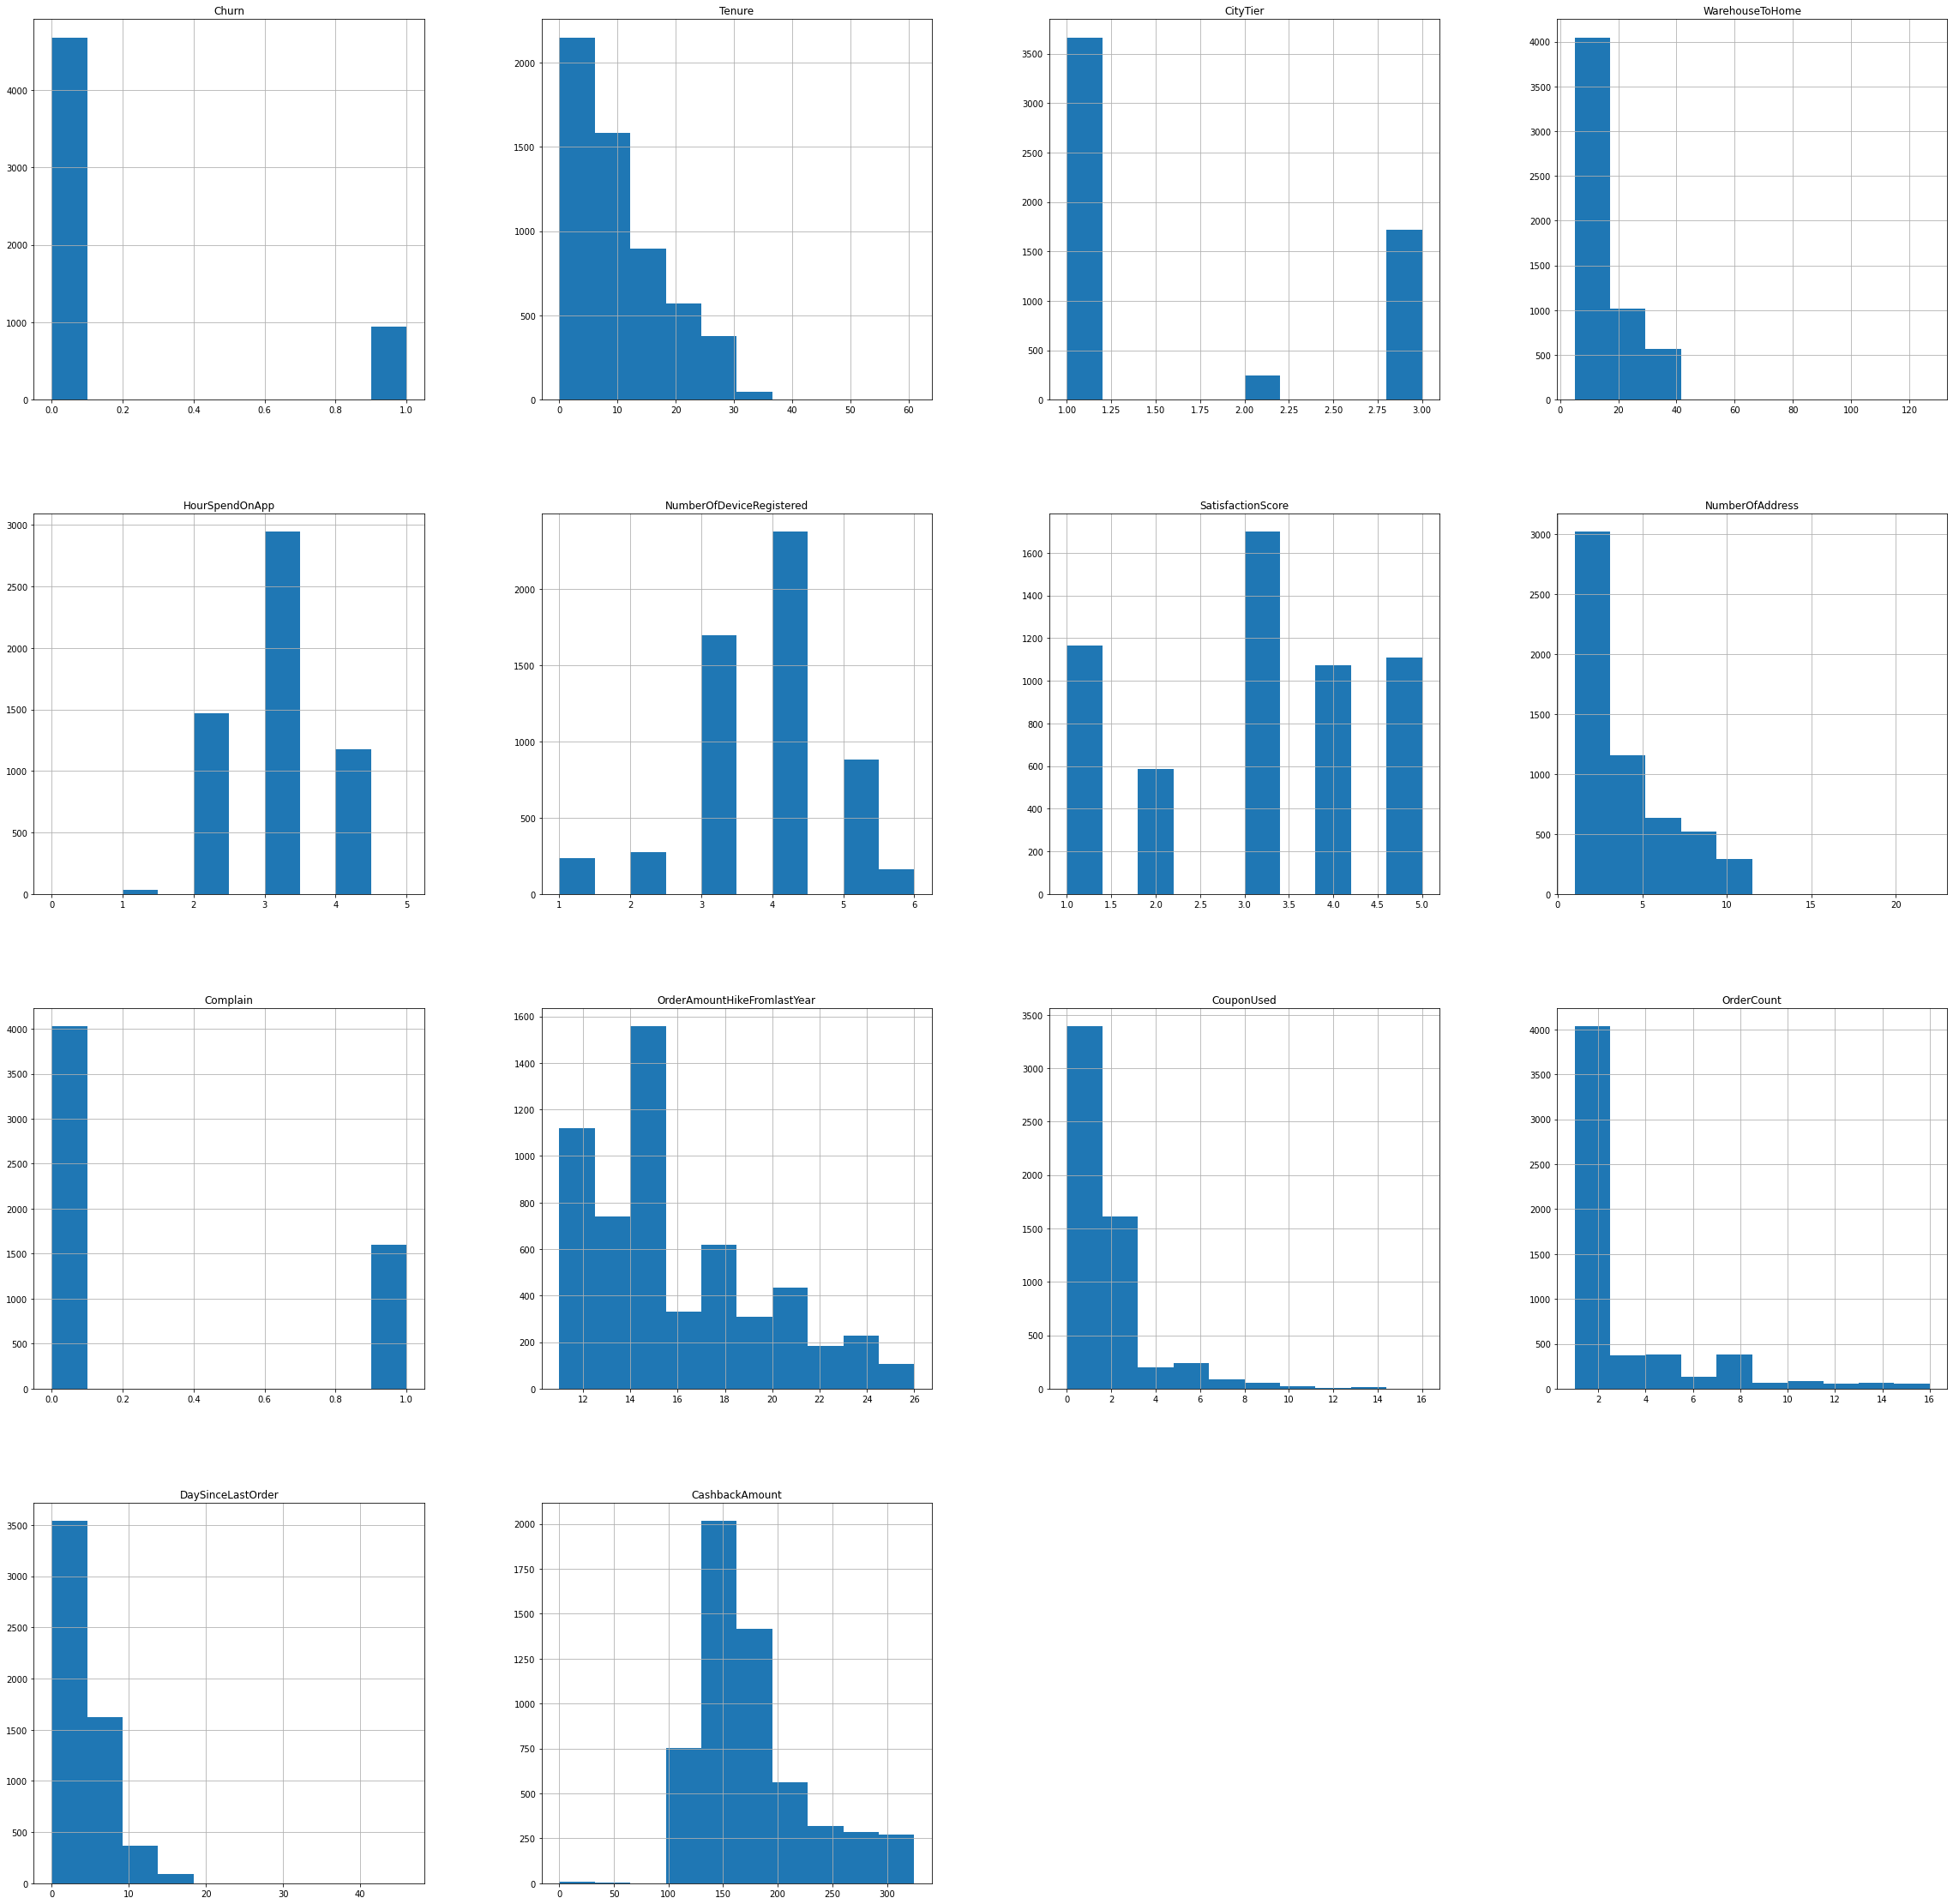

In [ ]:
num.remove('CustomerID')
data[num].hist(figsize=(40,40))

In [ ]:
# sns.set_context("paper", rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":40})   

# # num.remove('CustomerID')

# fig, ax = plt.subplots(7, 2, figsize=(40, 80))
# for i, subplot in zip(num, ax.flatten()):
#     sns.distplot(data[i], ax=subplot)

## Data Preprocessing
<center><img src = "https://miro.medium.com/max/8332/1*wK8k8Vo8_c6jdYIjUWL_Pw.png" width="500"/></center><br>
<b>Need of Data Preprocessing<b><br>
- For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.<br>
- Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.

#### Outlier Treatment
Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.


Text(0, 0.5, 'Values')

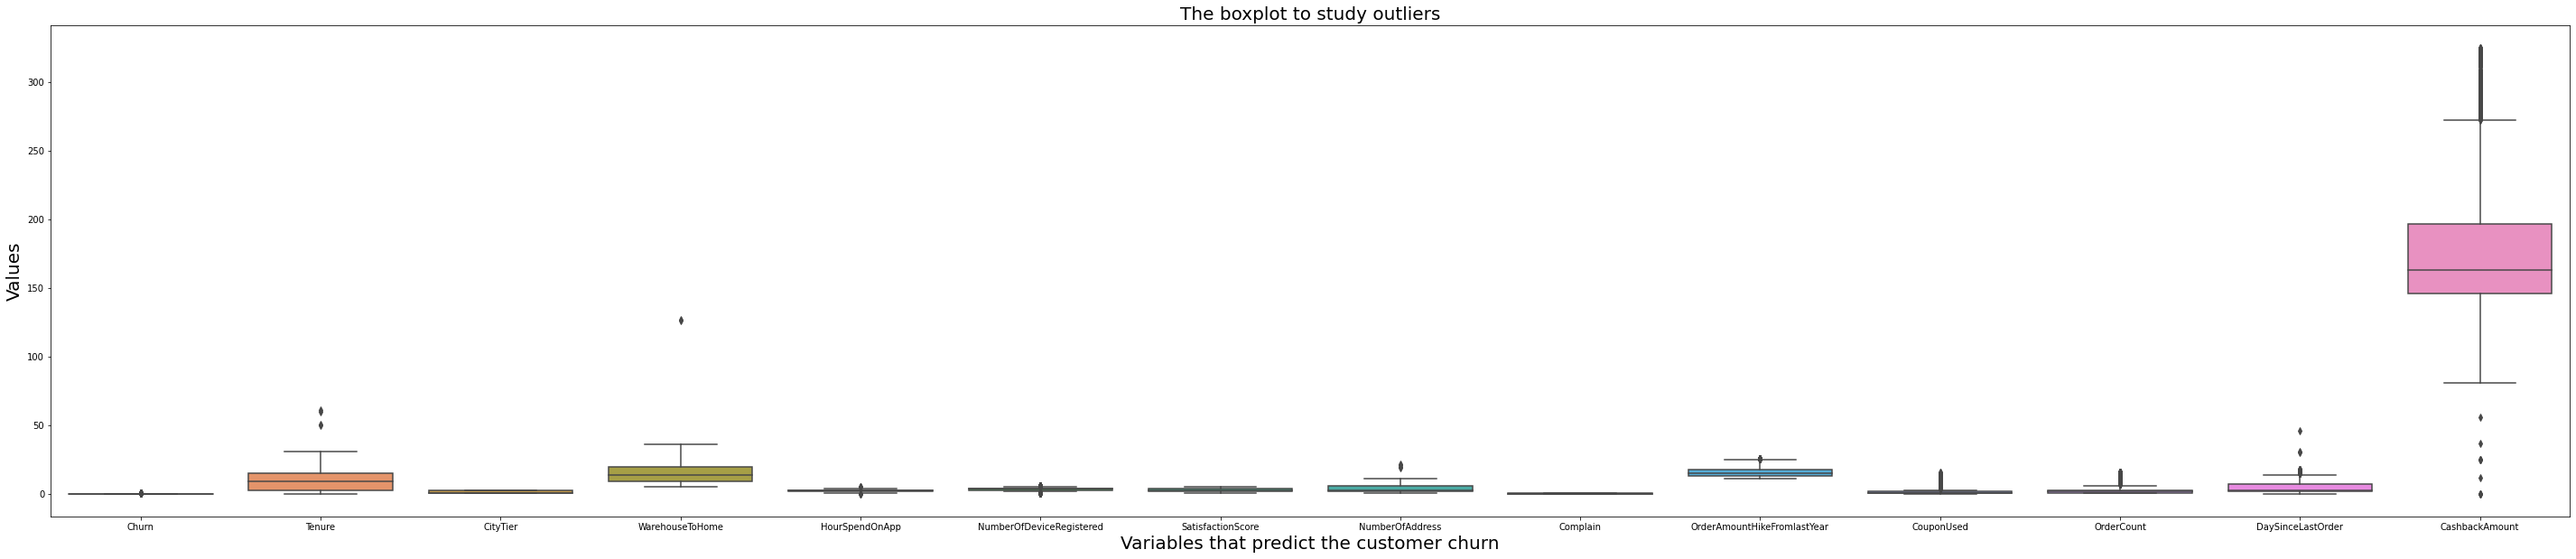

In [ ]:
data.drop('CustomerID',axis='columns', inplace=True)

plt.figure(figsize=(50,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers', fontsize =20)
plt.xlabel('Variables that predict the customer churn',fontsize =20)
plt.ylabel('Values',fontsize =20)

Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers

Text(0, 0.5, 'Values')

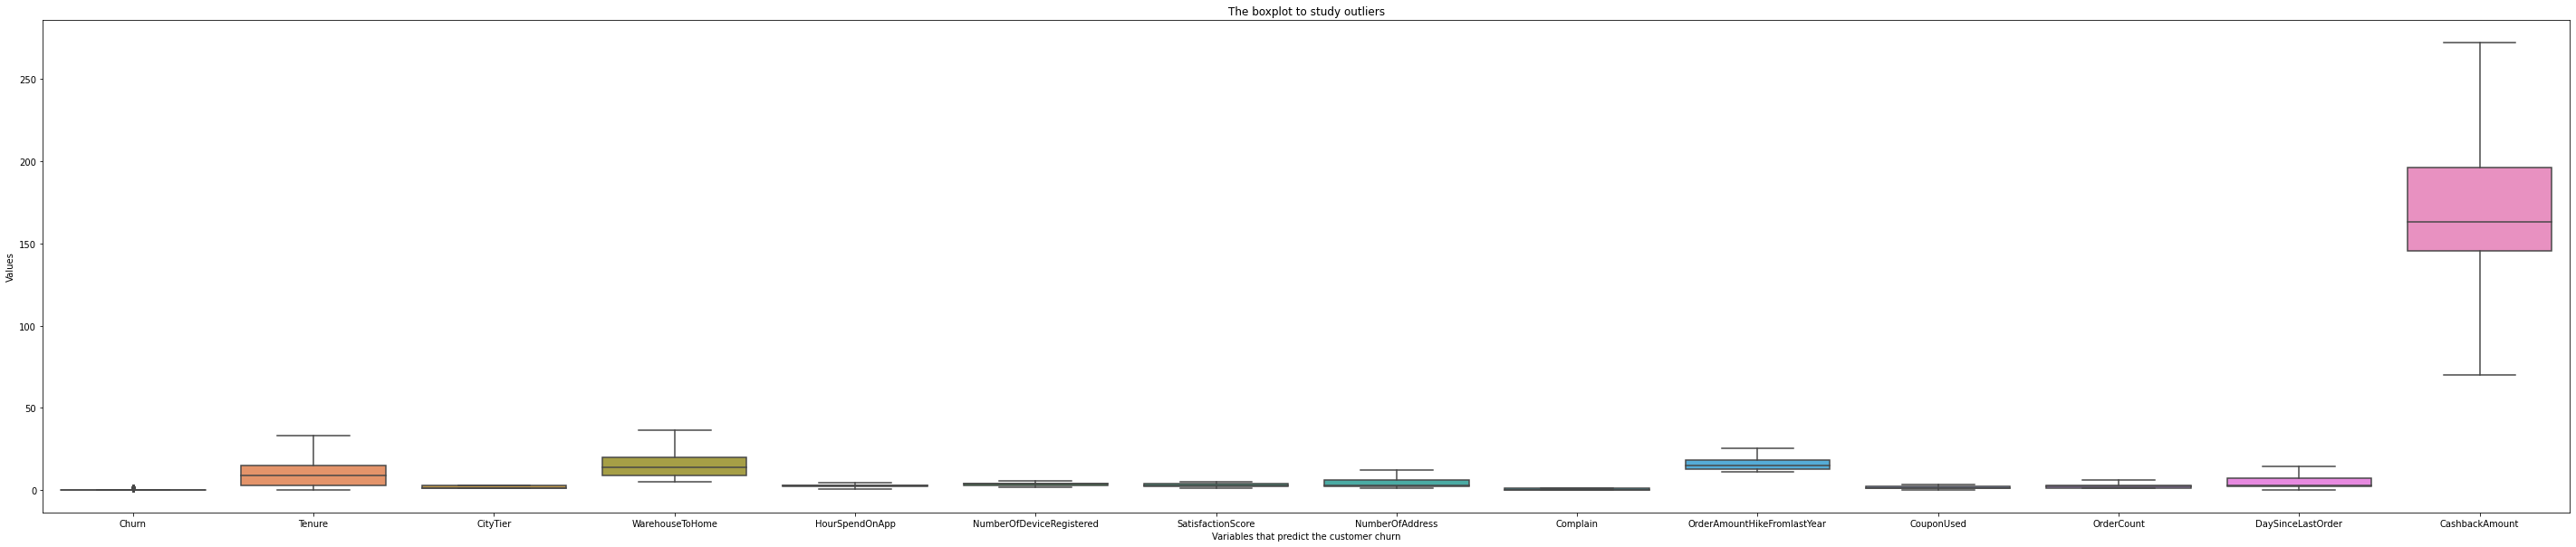

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

for column in data.columns:
    if data[column].dtype != 'object' and column != 'Churn': 
        lr,ur=remove_outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

plt.figure(figsize=(50,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [ ]:
data.shape

(5630, 19)

Here we can see that we have treated all the outliers. The outliers are now replaced with their corresponding upper range or lower range values

### Exploratory Data Analysis

Analysing Churn by each Variable

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.




In [ ]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in data.columns:
  d[i] = pd.concat([data.groupby(i).Churn.sum(),data[i].value_counts(),round(data.groupby(i)['Churn'].sum()*100/data[i].value_counts(),2)], axis=1)
  d[i].reset_index(level=0,inplace=True)
  d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )


for i in data.columns:
  # if i != 'Churn':
  print(i)
  print(d[i])
  print()

Churn
   Churn  Total_Customers  Total_Customers  Total_Customers
0      0                0             4682              0.0
1      1              948              948            100.0

Tenure
    Tenure  Customers_churned  Total_Customers  perc_of_total_cust
0      0.0                272              508               53.54
1      1.0                349              690               50.58
2      2.0                 14              167                8.38
3      3.0                 18              195                9.23
4      4.0                 20              203                9.85
5      5.0                 16              204                7.84
6      6.0                  8              183                4.37
7      7.0                 16              221                7.24
8      8.0                 16              263                6.08
9      9.0                 93              511               18.20
10    10.0                 14              213                6.57
11

### Analysing the Churn by each Variable - Visualising via Graphs

In [ ]:
def analysis_chart(variable):
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  ax2=ax.twinx()
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  plt.ylabel ('percentage of customers churned')
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)

<Figure size 1440x864 with 0 Axes>

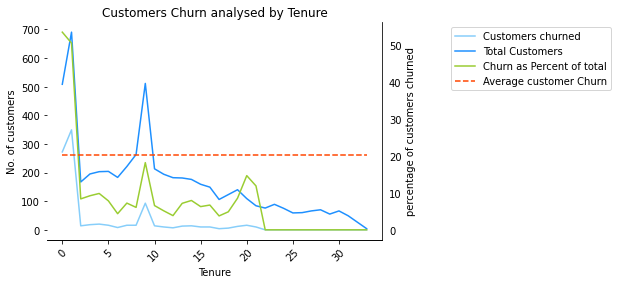

In [ ]:
analysis_chart('Tenure')

<Figure size 1440x864 with 0 Axes>

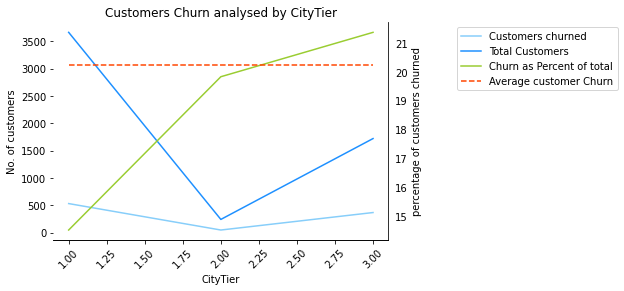

In [ ]:
analysis_chart('CityTier')

<Figure size 1440x864 with 0 Axes>

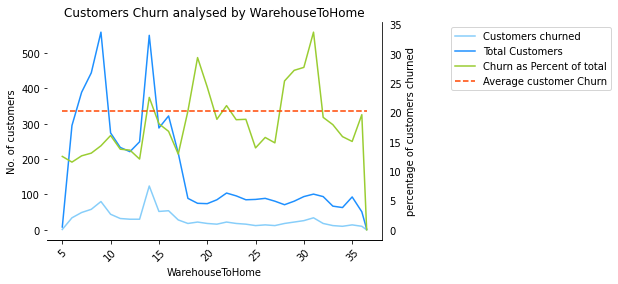

In [ ]:
analysis_chart('WarehouseToHome')

<Figure size 1440x864 with 0 Axes>

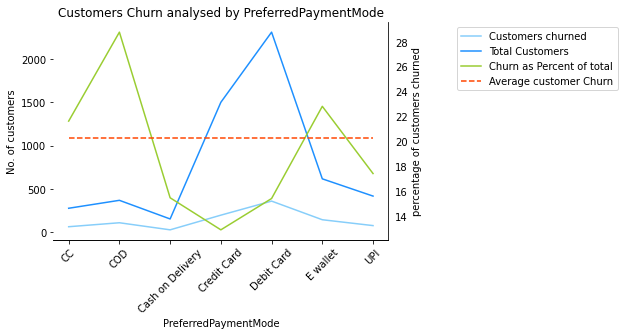

In [ ]:
analysis_chart('PreferredPaymentMode')

<Figure size 1440x864 with 0 Axes>

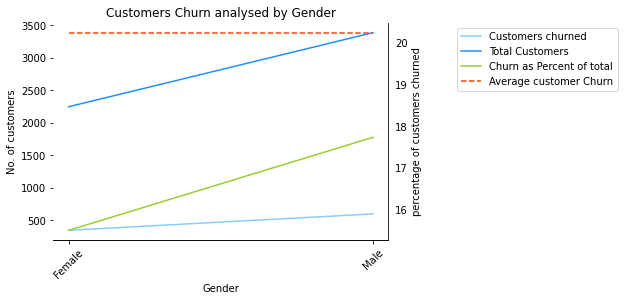

In [ ]:
analysis_chart('Gender')

<Figure size 1440x864 with 0 Axes>

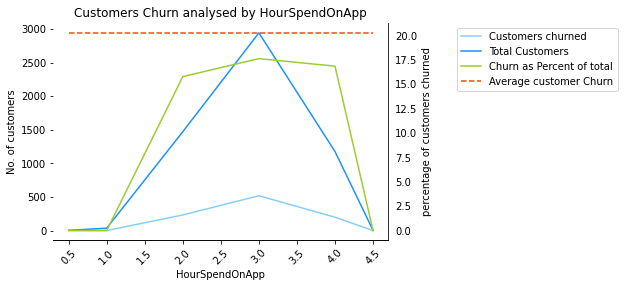

In [ ]:
analysis_chart('HourSpendOnApp')

<Figure size 1440x864 with 0 Axes>

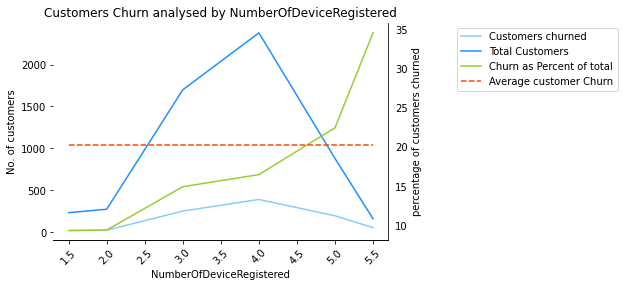

In [ ]:
analysis_chart('NumberOfDeviceRegistered')

<Figure size 1440x864 with 0 Axes>

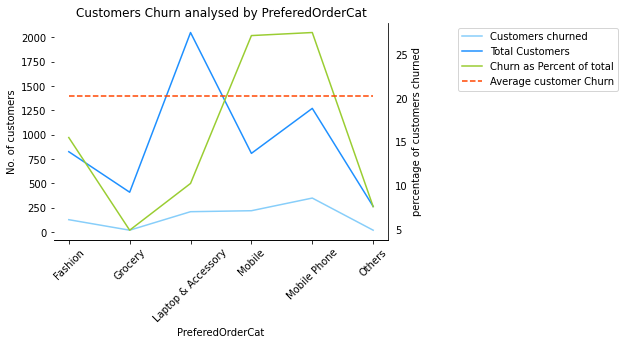

In [ ]:
analysis_chart('PreferedOrderCat')

<Figure size 1440x864 with 0 Axes>

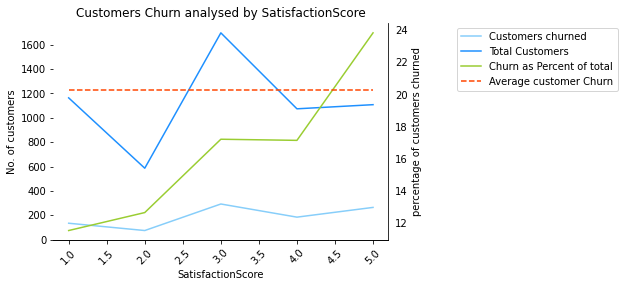

In [ ]:
analysis_chart('SatisfactionScore')

<Figure size 1440x864 with 0 Axes>

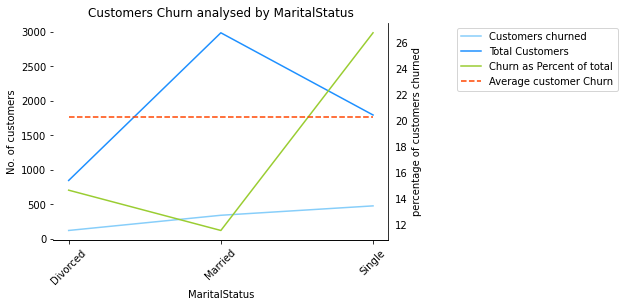

In [ ]:
analysis_chart('MaritalStatus')

<Figure size 1440x864 with 0 Axes>

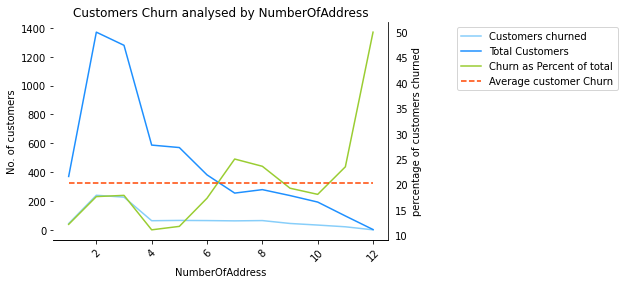

In [ ]:
analysis_chart('NumberOfAddress')

<Figure size 1440x864 with 0 Axes>

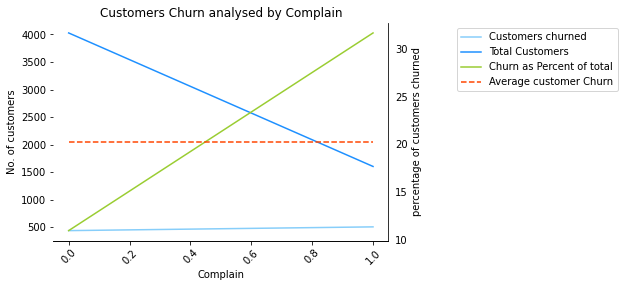

In [ ]:
analysis_chart('Complain')

<Figure size 1440x864 with 0 Axes>

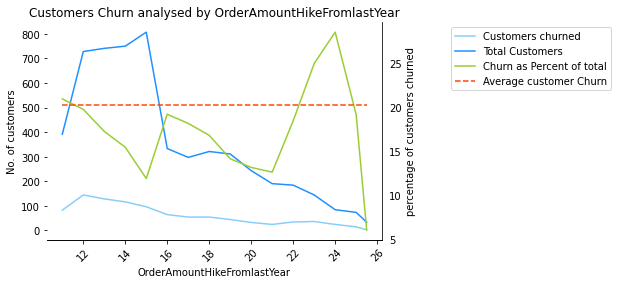

In [ ]:
analysis_chart('OrderAmountHikeFromlastYear')

<Figure size 1440x864 with 0 Axes>

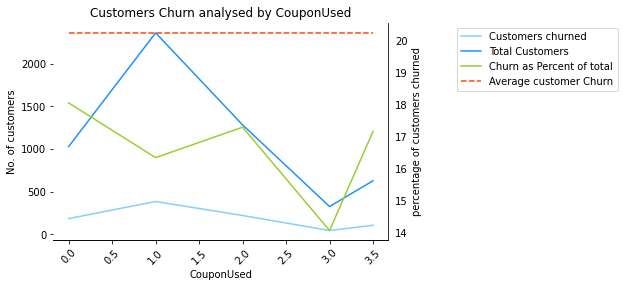

In [ ]:
analysis_chart('CouponUsed')

<Figure size 1440x864 with 0 Axes>

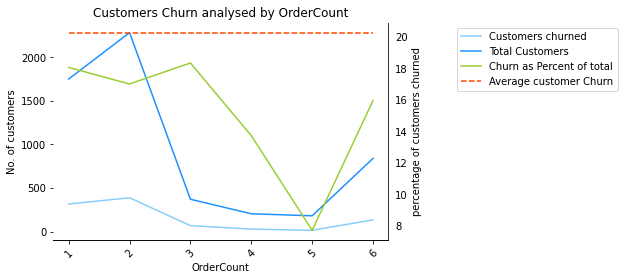

In [ ]:
analysis_chart('OrderCount')

<Figure size 1440x864 with 0 Axes>

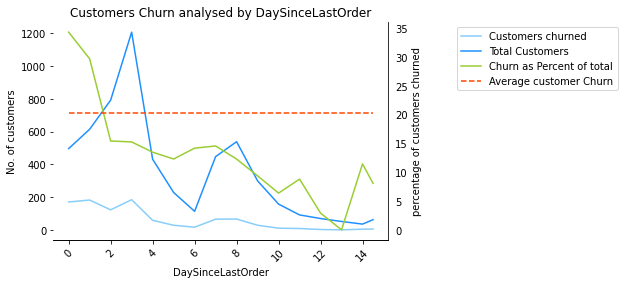

In [ ]:
analysis_chart('DaySinceLastOrder')

### EDA - Bivariate Analysis

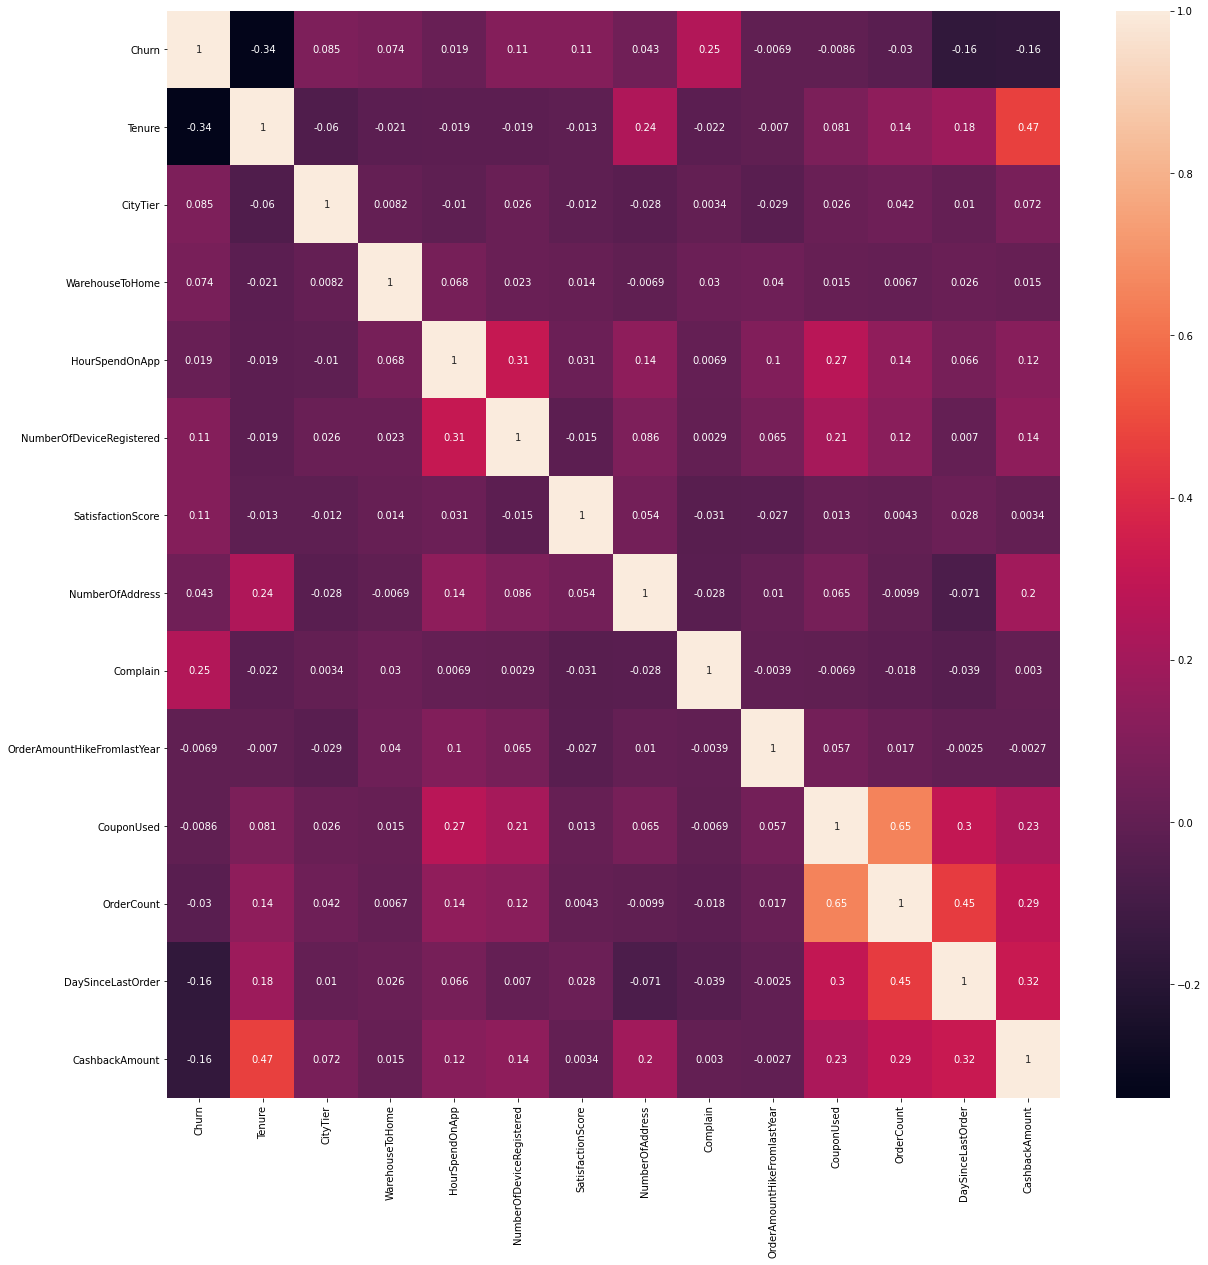

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## One Hot coding and Scaling of the data
### One hot encoding

<center><img src = "https://chrisalbon.com/images/machine_learning_flashcards/One-Hot_Encoding_print.png" width="500"/></center><br>


One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [ ]:
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1.0,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


In [ ]:
data_encoded=data.copy()
data_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1.0,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


In [ ]:
data_encoded = pd.get_dummies(data_encoded,drop_first=True)
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(data_encoded[cat]).toarray())
# data_encoded = data_encoded.join(enc_df)
# data_encoded

In [ ]:
data_encoded.head(10)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
5,1,0.0,1.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,7.0,139.19,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,1,9.0,3.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,0.0,120.86,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
7,1,9.0,1.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,0.0,122.93,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8,1,13.0,3.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,2.0,126.83,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
9,1,9.0,1.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,1.0,122.93,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1


### Scaling the data

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.


In [ ]:
num.remove('Churn')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = data_encoded[num]
features = scaler.fit_transform(features)
scaled_df_encoded = data_encoded.copy()
scaled_df_encoded[num] = features
scaled_df_encoded

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,-0.737959,1.469771,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,0.166005,-0.349346,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,-0.134866,-0.715286,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,-1.287958,-1.235064,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,1,-0.134866,-0.715286,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,-0.415580,-1.249134,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,1,-1.220433,1.469771,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,-0.415580,-0.936194,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,1,-1.220433,-0.715286,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,-0.415580,-1.037633,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,-0.014247,-0.715286,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,-0.124788,-0.558578,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5626,0,0.347609,-0.715286,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,-0.415580,1.125264,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5627,0,-1.099814,-0.715286,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,-0.124788,0.251799,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
5628,0,1.553794,1.469771,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,1.329175,0.081146,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


## Building Classification models
Here since we have a scaled & encoded dataframe, along with the clusters. lets use that dataframe

In [ ]:
scaled_df_encoded

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,-0.737959,1.469771,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,0.166005,-0.349346,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,-0.134866,-0.715286,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,-1.287958,-1.235064,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,1,-0.134866,-0.715286,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,-0.415580,-1.249134,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,1,-1.220433,1.469771,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,-0.415580,-0.936194,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,1,-1.220433,-0.715286,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,-0.415580,-1.037633,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,-0.014247,-0.715286,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,-0.124788,-0.558578,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5626,0,0.347609,-0.715286,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,-0.415580,1.125264,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5627,0,-1.099814,-0.715286,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,-0.124788,0.251799,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
5628,0,1.553794,1.469771,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,1.329175,0.081146,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_df_encoded.drop(['Churn'],axis=1)
y = scaled_df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

In [ ]:
X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,1.469771,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,0.166005,-0.349346,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.715286,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,-1.287958,-1.235064,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,-0.134866,-0.715286,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,-0.415580,-1.249134,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,-1.220433,1.469771,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,-0.415580,-0.936194,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.715286,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,-0.415580,-1.037633,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1


## Logistic regression

<center>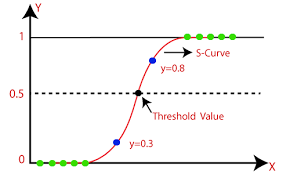</center>

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_lr.score(X_train, y_train)

0.8905731880625296

In [ ]:
ypred = model_lr.predict(X_test)

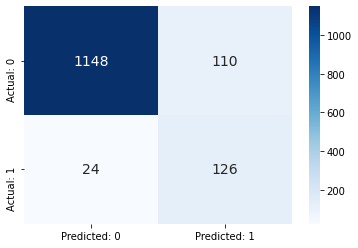

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(ypred, y_test),columns = ['Predicted: 0', 'Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1172
           1       0.84      0.53      0.65       236

    accuracy                           0.90      1408
   macro avg       0.88      0.76      0.80      1408
weighted avg       0.90      0.90      0.90      1408



## Linear Discriminant Analysis

Linear discriminant analysis (LDA) is generally used to classify patterns between two classes; however, it can be extended to classify multiple patterns. LDA assumes that all classes are linearly separable and according to this multiple linear discrimination function representing several hyperplanes in the feature space are created to distinguish the classes. If there are two classes then the LDA draws one hyperplane and projects the data onto this hyperplane in such a way as to maximize the separation of the two categories. This hyperplane is created according to the two criteria considered simultaneously:

- Maximizing the distance between the means of two classes;

- Minimizing the variation between each category.


<center><img src="https://nirpyresearch.com/wp-content/uploads/2018/11/PCAvsLDA.png" width = 500px></center>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()

In [ ]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
ypred = LDA_model.predict(X_train)
LDA_model.score(X_train, y_train)


0.8848886783514922

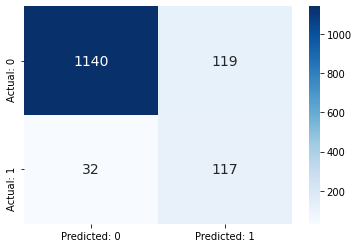

In [ ]:
ypred = LDA_model.predict(X_test)
con_mat = pd.DataFrame(confusion_matrix(ypred, y_test),columns = ['Predicted: 0', 'Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1172
           1       0.79      0.50      0.61       236

    accuracy                           0.89      1408
   macro avg       0.85      0.73      0.77      1408
weighted avg       0.89      0.89      0.88      1408



## Decision Tree

<center><img src="https://miro.medium.com/max/3840/1*jojTznh4HOX_8cGw_04ODA.png" alt="decision tree" width = 500px></center>

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [ ]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ypred = DT_model.predict(X_test)
DT_model.score(X_test, y_test)

0.9595170454545454

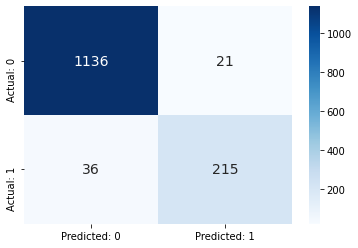

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(ypred, y_test),columns = ['Predicted: 0', 'Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1172
           1       0.86      0.91      0.88       236

    accuracy                           0.96      1408
   macro avg       0.92      0.94      0.93      1408
weighted avg       0.96      0.96      0.96      1408



## Random Forest

<center><img src="https://editor.analyticsvidhya.com/uploads/74060RF%20image.jpg" alt="Random Forest" width=500px></center>

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
ypred = RF_model.predict(X_test)
RF_model.score(X_test, y_test)

0.9666193181818182

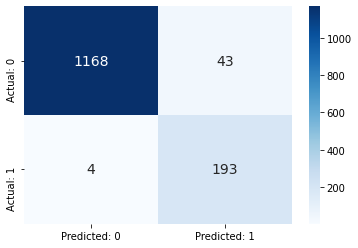

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(ypred, y_test),columns = ['Predicted: 0', 'Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1172
           1       0.98      0.82      0.89       236

    accuracy                           0.97      1408
   macro avg       0.97      0.91      0.94      1408
weighted avg       0.97      0.97      0.97      1408



## XGBoost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. Three main forms of gradient boosting are supported:

*   Gradient Boosting algorithm also called gradient boosting machine including the learning rate.
*   Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.
*   Regularized Gradient Boosting with both L1 and L2 regularization.

<center><img src="https://1fykyq3mdn5r21tpna3wkdyi-wpengine.netdna-ssl.com/wp-content/uploads/2019/12/Header-Image-768x329.png" alt="XGBoost"></center>

In [ ]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_predict = XGB_model.predict(X_test)
XGB_model.score(X_test, y_test)

0.8806818181818182

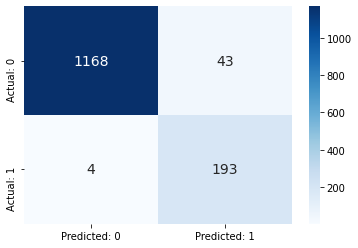

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(ypred, y_test),columns = ['Predicted: 0', 'Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1172
           1       0.98      0.82      0.89       236

    accuracy                           0.97      1408
   macro avg       0.97      0.91      0.94      1408
weighted avg       0.97      0.97      0.97      1408



Since Random Forest shows the greatest accuracy of 96% we will now make an sklearn pipeline using Random Forest.

## Making a Pipeline

In [ ]:
X = data.drop(['Churn'],axis=1)
# X.drop('CustomerID')
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)


In [ ]:
X_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1425,3.0,Mobile Phone,1.0,6.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,1.0,Married,2.0,1.0,12.0,1.0,3.0,0.0,151.26
4603,1.0,Computer,1.0,11.0,COD,Male,4.0,5.0,Mobile Phone,3.0,Single,7.0,0.0,17.0,1.0,2.0,3.0,163.94
5575,7.0,Computer,1.0,8.0,Credit Card,Male,3.0,5.0,Mobile Phone,3.0,Married,3.0,0.0,13.0,1.0,2.0,1.0,145.08
1550,0.0,Mobile Phone,3.0,33.0,E wallet,Female,2.0,3.0,Fashion,1.0,Married,2.0,0.0,22.0,0.0,1.0,9.0,176.39
1983,0.0,Phone,3.0,10.0,E wallet,Male,2.0,4.0,Laptop & Accessory,5.0,Married,2.0,0.0,12.0,1.0,1.0,3.0,142.56


In [ ]:
y_train.head()

1425    0
4603    1
5575    0
1550    1
1983    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer


num1.remove('CustomerID')
num1.remove('Churn')

print(num1)

col_trans = make_column_transformer((StandardScaler(), num1),(OneHotEncoder(), cat1))

pipeline = make_pipeline(col_trans, RandomForestClassifier())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


0.9609375

In [ ]:
import pickle
pickle.dump(pipeline,open('model.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('model.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.9609375


In [ ]:
# test = [3.0, 'Computer', 1.0, 6.0, 'COD', 'Male', 2.0, 5.0, 'Mobile Phone', 5.0, 'Married', 2.0, 2.0, 22.0, 2.0, 3.0, 9.0, 144.25 ]
test = [4.0,	'Mobile Phone',	3.0,	6.0,	'Debit Card',	'Female',	3.0,	3.0,	'Laptop & Accessory',	2.0,	'Single',	9.0,	1.0,	11.0,	1.0,	1.0,	5.0,	159.93]

c = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']
print(c)

df = pd.DataFrame([test], columns=c)

res = loaded_model.predict(df)
prob = loaded_model.predict_proba(df)
print(res)
if res[0]:
  print("Probability of customer churning", prob[0][1]*100,"%")
else:
  print("probability of customer not churning",prob[0][0]*100,"%")

['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
[1]
Probability of customer churning 69.0 %


## CNN


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from IPython.display import SVG
from keras.utils import model_to_dot

In [ ]:
# test = [3.0, 'Computer', 1.0, 6.0, 'COD', 'Male', 2.0, 5.0, 'Mobile Phone', 5.0, 'Married', 2.0, 2.0, 22.0, 2.0, 3.0, 9.0, 144.25 ]
test = [4.0,	'Mobile Phone',	3.0,	6.0,	'Debit Card',	'Female',	3.0,	3.0,	'Laptop & Accessory',	2.0,	'Single',	9.0,	1.0,	11.0,	1.0,	1.0,	5.0,	159.93]

# c = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
#        'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
#        'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
#        'MaritalStatus', 'NumberOfAddress', 'Complain',
#        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
#        'DaySinceLastOrder', 'CashbackAmount']

df = pd.DataFrame([test], columns=c)

def create_larger1():
    model = Sequential()
    model.add(Dense(100, input_dim=34, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# num1.remove('CustomerID')
# num1.remove('Churn')
X = data.drop(['Churn'],axis=1)
# X.drop('CustomerID')
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

print(num1)

col_trans = make_column_transformer((StandardScaler(), num1),(OneHotEncoder(), cat1))

pipe = make_pipeline(col_trans, KerasClassifier(build_fn=create_larger1, epochs=90, batch_size=5, verbose=1))
pipe.fit(X_train, y_train)


['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Epoch 1/90
845/845 [==============================] - 2s 1ms/step - loss: 0.3531 - accuracy: 0.8585
Epoch 2/90
845/845 [==============================] - 1s 2ms/step - loss: 0.2535 - accuracy: 0.8951
Epoch 3/90
845/845 [==============================] - 1s 2ms/step - loss: 0.2338 - accuracy: 0.9117
Epoch 4/90
845/845 [==============================] - 1s 2ms/step - loss: 0.1962 - accuracy: 0.9238
Epoch 5/90
845/845 [==============================] - 1s 2ms/step - loss: 0.1637 - accuracy: 0.9353
Epoch 6/90
845/845 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9501
Epoch 7/90
845/845 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.9558
Epoch 8/90
845/845 [==============================] - 1s 2ms/s

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Tenure', 'CityTier',
                                                   'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',...
              

In [ ]:
# make_pipeline(col_trans, KerasClassifier(build_fn=create_larger1, epochs=90, batch_size=5, verbose=1))

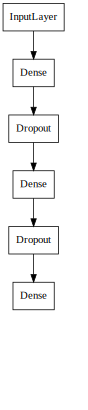

In [ ]:
def plot_keras_model(model, show_shapes=True,show_layer_names=True):
    return SVG(model_to_dot(model, show_layer_names=show_layer_names,dpi=55).create(prog='dot',format='svg'))
plot_keras_model(create_larger1(), show_shapes=True, show_layer_names=False)

198/282 [====================>.........] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


282/282 [==============================] - 0s 783us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1172
           1       0.96      0.88      0.92       236

    accuracy                           0.97      1408
   macro avg       0.97      0.94      0.95      1408
weighted avg       0.97      0.97      0.97      1408



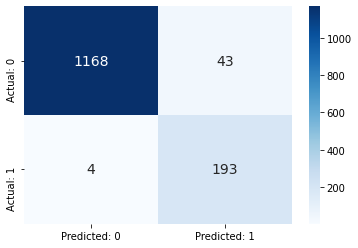

In [ ]:
y_predict = pipe.predict(X_test)
print(classification_report(y_test, y_predict))
con_mat = pd.DataFrame(confusion_matrix(ypred, y_test),columns = ['Predicted: 0', 'Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

In [ ]:
sc = pipe.score(X_test, y_test)
print("The accuracy of the model is",sc*100,"%")
res = pipe.predict(df)
print(res)
prob = pipe.predict_proba(df)
print(res)
if res[0]:
  print("Probability of customer churning is", prob[0][1]*100,"%")
else:
  print("probability of customer not churning is",prob[0][0]*100,"%")

282/282 [==============================] - 0s 976us/step - loss: 0.2175 - accuracy: 0.9737
The accuracy of the model is 97.37215638160706 %
1/1 [==============================] - 0s 15ms/step
[[1]]
1/1 [==============================] - 0s 15ms/step
[[1]]
Probability of customer churning is 99.99959468841553 %


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
from keras.models import load_model
from sklearn.externals import joblib


# Save the Keras model first:
pipe.named_steps['kerasclassifier'].model.save('keras_model.h5')

# This hack allows us to save the sklearn pipeline:
pipe.named_steps['kerasclassifier'].model = None

# Finally, save the pipeline:
joblib.dump(pipe, 'sklearn_pipeline.joblib')



In [ ]:
import pickle
# pickle.dump(pipe,open('sklearn_pipline.pkl','wb'))
# loaded_model = pickle.load(open('sklearn_pipeline.pkl', 'rb'))

loaded = joblib.load('sklearn_pipeline.joblib')
loaded.named_steps['kerasclassifier'].model = load_model('keras_model.h5')
result = loaded.score(X_test,y_test)

res = loaded.predict(df)
print(res[0])
prob = loaded.predict_proba(df)
print(res[0])
if res[0]:
  print("Probability of customer churning is", prob[0][1]*100,"%")
else:
  print("probability of customer not churning is",prob[0][0]*100,"%")

print(result)

In [ ]:
loaded

In [ ]:
col_trans = make_column_transformer((StandardScaler(), num1),(OneHotEncoder(), cat1))

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)
test = [4.0,	'Mobile Phone',	3.0,	6.0,	'Debit Card',	'Female',	3.0,	3.0,	'Laptop & Accessory',	2.0,	'Single',	9.0,	1.0,	11.0,	1.0,	1.0,	5.0,	159.93]
# test = [3.0, 'Computer', 1.0, 6.0, 'COD', 'Male', 2.0, 5.0, 'Mobile Phone', 5.0, 'Married', 2.0, 2.0, 22.0, 2.0, 3.0, 9.0, 144.25 ]
c = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

df = pd.DataFrame([test], columns=c)


# KerasClassifier(build_fn=create_larger1, epochs=90, batch_size=5, verbose=1)
# pipe = make_pipeline(col_trans)
X_train = col_trans.fit_transform(X_train)
tes = col_trans.transform(df)
def create_larger1():
    model = Sequential()
    model.add(Dense(100, input_dim=34, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
mod = create_larger1()

mod.fit(X_train, y_train, batch_size=5, epochs=90, verbose = 1)
r = mod.predict_classes(tes)
p = mod.predict(tes)

print(r)
print(p)

In [ ]:
p = mod.predict(tes)
print(p)

In [ ]:
joblib.dump(col_trans, 'coltrans.joblib')
mod.save('cnn.h5')